In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import random
import math
import warnings
from scipy import stats
from scipy.optimize import minimize

Questão 1. ( $5.0$ pontos)
Considere o modelo latente a seguir:
$$
\begin{aligned}
&y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
\end{aligned}
$$
onde o econometrista observa
$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right),
$$
sendo $\mathbb{I}\left(y_{1 i}^*>0\right)$ uma função indicadora com valor igual a 1 caso $y_{1 i}^*>0$ e 0 caso contrário. As seguintes propriedades são válidas:


* $\left(u_i, v_i\right)$ tem média zero, distribuição normal, independente de $x_i=\left(x_{1 i}, x_{2 i}, x_{3 i}\right)$;

* $u_i=\lambda v_i+\eta_i$, onde $\left(v_i, \eta_i\right)$ são independentes com distribuição normal padrão.

Para o exercício de simulação abaixo, considere o seguinte processo de geração de dados: $x_{1 i}$ é um termo constante, $(x_{2 i}, x_{3 i})$ vem de distribuições normais multivariada equicorrelacionadas, com médias zeros, variancias unitárias e covariância de 0.5. Os parâmetros são definidos como:


* $\gamma=1$ 
* $\beta_1=0$
* $\beta_2=-1$
* $\pi_1=0$
* $\pi_2=1$
* $\pi_3=1$
* $\lambda = 0.5$
* $n=100$ 

onde $n$ é o tamanho da amostra. Construa o se próprio código para as stimações abaixo, não use os comandos do software.

$\textbf{(a)} (1.0)$ Proponha um método de estimação para o problema acima baseado na densidade conjunta de $f\left(y_{1 i}, y_{2 i} \mid x_i\right)$. Obtenha a função de verossimilhança para a estimação.

Sabemos que

$$
f(y_{1i}, y_{2i}|x_i) = f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)
$$

Então precisamos encontrar $f(y_{1i}|y_{2i}, x_i)$ e $f(y_{2i}|x_i)$. Primeiro encontraremos $f(y_{2i}|x_i)$.

Pelo enunciado, temos a seguinte estrutura entre os erros

$$
\left(\begin{array}{l}
u_i \\
v_i
\end{array}\right) \sim \operatorname{NID}\left[\left(\begin{array}{l}
0 \\
0
\end{array}\right),\left(\begin{array}{ll}
\sigma_{u}^2 & \sigma_{u v} \\
\sigma_{v u} & \sigma_{v}^2
\end{array}\right)\right]
$$

Utilizando as propriedades da normal multivariada, temos os seguintes resultados

* Distribuição marginal

$$
\mathbb{D}(u_i) = \mathcal{N}(0, \sigma_u^2)\\
\mathbb{D}(v_i) = \mathcal{N}(0, \sigma_v^2)
$$

* Distribuição Condicional
$$
\mathbb{D}(u_i | v_i) = \mathcal{N}\left(\frac{\sigma{u v}}{\sigma_v^2}v_i, \sigma_u^2 - \frac{\sigma{u v}^2}{\sigma_v^2}\right)\\
\mathbb{D}(v_i | u_i) = \mathcal{N}\left(\frac{\sigma{v u}}{\sigma_u^2}u_i, \sigma_v^2 - \frac{\sigma{v u}^2}{\sigma_u^2}\right)\\
$$


Partindo então de $y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i$, temos

$$
\mathbb{E}[y_{2 i}| x_i] = \pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i} \\
\mathbb{V}[y_{2 i}| x_i] = \mathbb{V}[v_i | x_i] = \mathbb{V}[v_i] = 1
$$

Portanto

$$
\mathbb{D}(y_{2 i}|x_i) = \mathcal{N}\left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}, 1\right)
$$

Isso significa que

$$
\begin{aligned}
f(y_{2 i}| x_i) &= \frac{1}{\sqrt{2 \pi}}\exp{\left(-\frac{1}{2}\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)\right)} \\
&=\phi\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)
\end{aligned}
$$

onde $\phi(\cdot)$ é a pdf de uma distribuição normal padronizada

Agora precisamos definir $f(y_{1i}|y_{2i}, x_i)$

Primeiro, sabemos que $u_i = \lambda v_i + \eta_i$ onde 
* $v_i \sim \mathcal{N}(0,1)$
* $\eta_i \sim \mathcal{N}(0,1)$ 
* $v_i \perp \!\!\! \perp \eta_i$

e

$$
\lambda = \frac{\mathbb{C}[v_i, u_i]}{\mathbb{V}[v_i]} = \mathbb{C}[v_i, u_i] = \sigma_{v u}
$$

Reescrevendo 

$$
\begin{aligned}
y_{1 i}^* &=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\lambda v_i + \eta_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\sigma{v u}\left(y_{2 i} - \pi_1 x_{1 i}-\pi_2 x_{2 i}-\pi_3 x_{3 i}\right) + \eta_i \\
&=(\gamma+\sigma_{v u}) y_{2 i}+(\beta_1-\sigma_{v u}\pi_1) x_{1 i}+(\beta_2-\sigma_{v u}\pi_2) x_{2 i}-\sigma_{v u}\pi_3 x_{3 i} + \eta_i \\
\end{aligned}
$$

Como $y_{1 i} \in \{0, 1\}$, então

$$
f(y_{1 i}|y_{2 i}, x_i) = \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)^{y_{1 i}}\left[1 - \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)\right]^{(1-y_{1 i})}
$$

$$
\begin{aligned}
\mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i) &= \mathbb{P}(y_{1 i}^* > 0| y_{2 i}, x_i)\\
&= \mathbb{P}((\gamma+\sigma_{v u}) y_{2 i}+(\beta_1-\sigma_{v u}\pi_1) x_{1 i}+(\beta_2-\sigma_{v u}\pi_2) x_{2 i}-\sigma_{v u}\pi_3 x_{3 i} + \eta_i > 0 |y_{2 i}, x_i) \\
&= \mathbb{P}(\eta_i > - (\gamma+\sigma_{v u}) y_{2 i}-(\beta_1-\sigma_{v u}\pi_1) x_{1 i}-(\beta_2-\sigma_{v u}\pi_2) x_{2 i}+\sigma_{v u}\pi_3 x_{3 i} |y_{2 i}, x_i) \\
&=1 - \mathbb{P}(\eta_i < (\gamma+\sigma_{v u}) y_{2 i}+(\beta_1-\sigma_{v u}\pi_1) x_{1 i}+(\beta_2-\sigma_{v u}\pi_2) x_{2 i}-\sigma_{v u}\pi_3 x_{3 i} |y_{2 i}, x_i) \\
&=1 - \Phi((\gamma+\sigma_{v u}) y_{2 i}+(\beta_1-\sigma_{v u}\pi_1) x_{1 i}+(\beta_2-\sigma_{v u}\pi_2) x_{2 i}-\sigma_{v u}\pi_3 x_{3 i}) \\
&=\Phi(-(\gamma+\sigma_{v u}) y_{2 i}-(\beta_1-\sigma_{v u}\pi_1) x_{1 i}-(\beta_2-\sigma_{v u}\pi_2) x_{2 i}+\sigma_{v u}\pi_3 x_{3 i}) \\
&\equiv \Phi(w)
\end{aligned}
$$

Portanto

$$
\begin{aligned}
f(y_{1i}, y_{2i}|x_i) &= f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)\\
&=\Phi(w)^{y_{1 i}}\left[1-\Phi(w)\right]^{(1-y_{1 i})}\cdot \phi(y_{2 i} - \pi_1 x_{1 i} - \pi_2 x_{2 i} - \pi_3 x_{3 i})
\end{aligned}
$$


Aplicando $\ln(\cdot)$

$$
\begin{aligned}
\ln(f(y_{1i}, y_{2i}|x_i)) &= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \ln\left[\frac{1}{\sqrt{2 \pi}}\exp{\left(-\frac{1}{2}\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)\right)}\right]\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \underbrace{\ln\left[\frac{1}{\sqrt{2 \pi}}\right]}_{\operatorname{\text{podemos desconsiderar}}} -\frac{1}{2}\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] -\frac{1}{2}\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)\\
\end{aligned}
$$

Finalmente temos que a Likelihood é 

$$
\mathcal{L} = \prod_{i=1}^n f(y_{1 i}, y_{2 i}| x_i)
$$

e a Log-Likelihood é

$$
\ln(\mathcal{L}) = \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right]
$$

In [2]:
# garante a replicabilidade dos valores aleatórios
random.seed(10)
warnings.filterwarnings('ignore')

In [3]:
# valores dos parâmetros verdadeiros

gamma = 1
beta_1 = 0
beta_2 = -1
pi_1 = 0
pi_2 = 1
pi_3 = 1
lambdaa = 0.5

n = 100

In [4]:
# gerando normais padronizadas independentes
v = np.random.normal(0, 1, n)
eta = np.random.normal(0, 1, n)

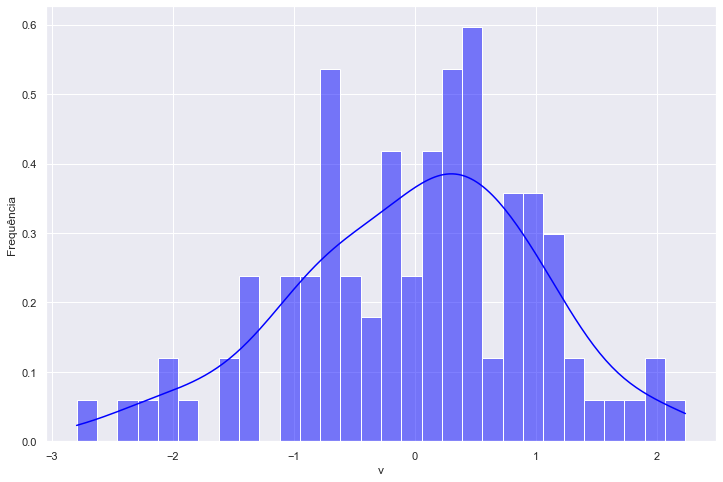

In [5]:
# plot da distribuição de v
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(v,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='v', ylabel='Frequência');

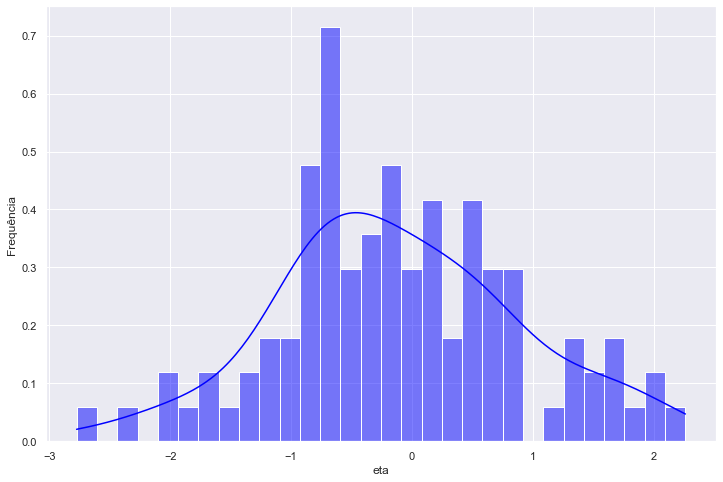

In [6]:
# plot da distribuição de eta
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(eta,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='eta', ylabel='Frequência');

In [7]:
# matriz de covariância entre v e eta
np.cov(v, eta)

array([[1.01523993, 0.12215974],
       [0.12215974, 1.01371283]])

onde os valores assintóticos devem ser

$$
\mathbb{V}[v] = 1 \\
\mathbb{V}[\eta] = 1 \\
\mathbb{C}[v, \eta] = \mathbb{C}[\eta, v] = 0 \\
$$

In [8]:
# criando u genérico
u = np.zeros(100)

$$
u_i = \lambda v_i + \eta_i
$$

In [9]:
# definindo u
for i in range(n):
    u[i] = lambdaa*v[i] + eta[i]

In [10]:
# matriz de covariância entre u e v
np.cov(u, v)

array([[1.38968256, 0.62977971],
       [0.62977971, 1.01523993]])

onde a teoria nos diz que 

$$
\begin{aligned}
\mathbb{C}[u, v] &= \mathbb{C}[\lambda v + \eta, v]  \\
&= \lambda\mathbb{C}[v, v] + \mathbb{C}[\eta, v] \\
&= \lambda \mathbb{V}[v] + \mathbb{C}[\eta, v] \\
&= 0.5\cdot 1 + 0 = 0.5
\end{aligned}
$$

In [11]:
# gerandos x1
x1 = np.ones(100)

In [12]:
# gerando x2, x3
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

x2, x3 = np.random.multivariate_normal(mean, cov, 100).T

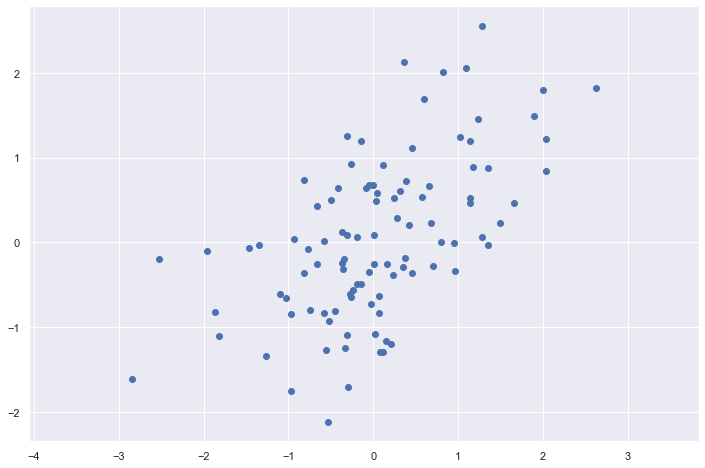

In [17]:
# densidade conjunta de x2 e x3
plt.plot(x2, x3, 'o')
plt.axis('equal')
plt.show()

In [14]:
np.cov(x2,x3)

array([[0.94034369, 0.52711316],
       [0.52711316, 0.89798894]])

$$
y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
$$

In [15]:
# definindo y2
y2 = np.zeros(100)

for i in range(n):
    y2[i] = pi_1*x1[i] + pi_2*x2[i] + pi_3*x3[i] + v[i]

$$
y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i
$$

In [16]:
# definindo y1*
y1_star = np.zeros(100)

for i in range(n):
    y1_star[i] = gamma*y2[i] + beta_1*x1[i] + beta_2*x2[i] + u[i]

$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right)
$$

In [18]:
# definindo y1
y1 = np.zeros(100)

for i in range(n):
    if y1_star[i] > 0:
        y1[i] = 1
    else:
        y1[i] = 0